# Assignment 6 – Prescriptive Analytics: Simulation

In [257]:
from datetime import datetime, timedelta
print(f'Updated {datetime.now().strftime("%d.%m.%Y")} / Tatu Erkinjuntti')

Updated 02.12.2025 / Tatu Erkinjuntti


## Assignment: Monte Carlo simulation with Python &ndash; Sales forecasting

### Learning objectives

This assignment introduces us to simulation using Python and the use of simulation in decision-making. In doing so, you will also learn how to present information clearly and how to document and explain calculation steps created with Jupyter Google Colab notebookm (or Jupter notebook)

Add explanations and interpretations of your calculations to the notebook, as well as insights for possible further development.

### Initial information

The company wants to assess how profitable their new product will be, taking into account certain uncertainties such as sales volume, costs, and turnover.

Basically, this is simply a calculation of the profit, more precisely
$$\textsf{Profit } = \textsf{ Turnover } - \textsf{ Costs }.$$
Both turnover and costs are uncertain variables in this analysis.

Turnover is calculated as a specific percentage ($r$) of the number of advertisements published on social media ($l$ advertisements a month), taking into account the profit attained from each individual product ($p$ euros).

The total costs are calculated as the cost per individual social media advertisement ($c$ euros for an advertisement) and their total number ($l$ pcs/month), taking into account the company's fixed costs ($h$ euros).

Here it is assumed that $l$, $r$, $p$, $h$, and $c$ are independent of each other. Note that turnover and costs are still not independent.

The result can now be calculated as follows
$$\textrm{Profit}=l\cdot r\cdot p - (l\cdot c + h).$$

Based on historical data, the variables are assumed to be distributed as follows and have the following values:
* Number of ads $l$: normally distributed, mean 1,500, standard deviation 165
* Proportion leading to a purchase $r$: evenly distributed, min 1%, max 5%
* profit per product $p$: evenly distributed, min €47, max €53
* cost per advertisement $c$: evenly distributed, min €0.20, max €0.80
* company's fixed costs $h$: €800 per month (fixed).

### Matters to be found out

Use Monte Carlo simulation to estimate the company's monthly results. You can change the above example values to better suit your situation and also make other assumptions needed for the calculation.

In [258]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid')

### Preparing variables

In [259]:
# Lets start by defining the variables

num_simulation = 10000 # Lets try 10.000 for statistical significance

# Number of Adds (l)
l_mean = 1500
l_std = 165

# Proportion leading to a purchase (r)
r_min = 0.01
r_max = 0.05

# Profit per product (p)
p_min = 47
p_max = 53

# Cost per advertisement (c)
c_min = 0.20
c_max = 0.80

# fixed costs
h = 800

### Data randomising

Once the stage has been set, lets generate random data for each variable.

**Note:** The Monte Carlo reference example used a for loop for this part, but I believe that this vectorisation approach might be more elegant, since its more human-readable.

In [260]:
# Number of adds (l): Normal distribution
l_simulated = np.random.normal(l_mean, l_std, num_simulation)

# Proportion leading to a purchase (r): Even (Uniform) distribution
r_simulated = np.random.uniform(r_min, r_max, num_simulation)

# Profit per product (p): Even (Uniform) distribution
p_simulated = np.random.uniform(p_min, p_max, num_simulation)

# Cost per add (c): Even (Uniform) distribution
c_simulated = np.random.uniform(c_min, c_max, num_simulation)

# Calculate Turnover: l * r * p
turnover_simulated = l_simulated * r_simulated * p_simulated

# Calculate Total Costs: l * c + h
costs_simulated = l_simulated * c_simulated + h

# Calculate Profit: Turnover - Costs
profit_simulated = turnover_simulated - costs_simulated

In [261]:
# Lets create a Pandas DataFrame to hold the results
df_results = pd.DataFrame({
    'Adds (l)': l_simulated,
    'Proportion leading to a purchase (r)': r_simulated,
    'Profit per Product (p)': p_simulated,
    'Cost per Add (c)': c_simulated,
    'Turnover': turnover_simulated,
    'Total Costs': costs_simulated,
    'Profit': profit_simulated
})

# Lets quickly check the dataframe.
df_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Adds (l)                              10000 non-null  float64
 1   Proportion leading to a purchase (r)  10000 non-null  float64
 2   Profit per Product (p)                10000 non-null  float64
 3   Cost per Add (c)                      10000 non-null  float64
 4   Turnover                              10000 non-null  float64
 5   Total Costs                           10000 non-null  float64
 6   Profit                                10000 non-null  float64
dtypes: float64(7)
memory usage: 547.0 KB


In [262]:
# Print first five (5) rows of the results
print(df_results.head())

      Adds (l)  Proportion leading to a purchase (r)  Profit per Product (p)  \
0  1483.830252                              0.035066               49.050147   
1  1278.757718                              0.032177               51.036125   
2  1502.058007                              0.030691               50.701690   
3  1693.356053                              0.040018               47.670810   
4  1183.639865                              0.019856               50.163460   

   Cost per Add (c)     Turnover  Total Costs       Profit  
0          0.717851  2552.185229  1865.168685   687.016544  
1          0.382342  2099.981587  1288.922265   811.059323  
2          0.206094  2337.363969  1109.564781  1227.799188  
3          0.598487  3230.439234  1813.451486  1416.987749  
4          0.566928  1178.988729  1471.038768  -292.050039  


### Calculating statistics

In [263]:
# General statistics of profits
mean_profit = df_results['Profit'].mean()
median_profit = df_results['Profit'].median()
std_dev_profit = df_results['Profit'].std()
min_profit = df_results['Profit'].min()
max_profit = df_results['Profit'].max()

# Calculate the probability of profit loss.
loss_probability = (df_results['Profit'] < 0).mean() * 100

print("SIMULATION STATISTICS\n")

print(f"Mean Monthly Profit:   {mean_profit:,.2f} €")
print(f"Median Monthly Profit: {median_profit:,.2f} €")
print(f"Standard Deviation:    {std_dev_profit:,.2f} €")
print(f"Minimum Profit:        {min_profit:,.2f} €")
print(f"Maximum Profit:        {max_profit:,.2f} €")
print(f"Probability of Loss:   {loss_probability:.2f}%")


SIMULATION STATISTICS

Mean Monthly Profit:   708.84 €
Median Monthly Profit: 708.34 €
Standard Deviation:    929.73 €
Minimum Profit:        -1,327.62 €
Maximum Profit:        3,476.39 €
Probability of Loss:   27.04%


# Visualising the results

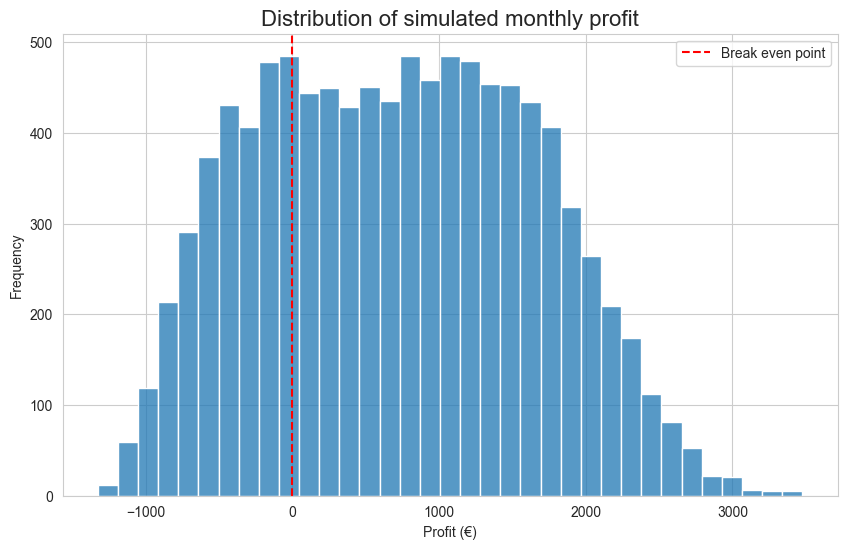

In [264]:
# This figure size worked best in my opinion.
plt.figure(figsize=(10, 6))

# A histogram is a suitable option for representing the results
sns.histplot(df_results['Profit'])

# Lets add relevant titles and labels
plt.title('Distribution of simulated monthly profit', fontsize=16) # Lets make the title a bit bigger, the default fontsize seems to be 12.
plt.xlabel('Profit (€)')
plt.ylabel('Frequency')

# For convenience, lets add a vertical bar for the assumed break even point.
plt.axvline(x=0, color='red', linestyle='--', label='Break even point')

plt.legend()
plt.show()


### Assignment Summary

By using the Monte Carlo simulation to estimate the companies monthly results, we can determine that the expected monthly profit is approximately 700 €.

In my opinion, the probability for loss of profits is quite high, at approximately 27 % and my assessment is that this is that the monthly costs (800 €) directly influences this.